<a href="https://colab.research.google.com/github/marialejandrapulido1/analitica-negocios/blob/main/PARCIAL_2_MAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maria Alejandra Pulido**

Parcial 2 - Redes neuronales

# **WACCS**

**Cargar librerias y conectar con Drive**

In [21]:
#cargar librerias
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#configuracion para modelo neuronal
#capas para la red
from keras.models import Sequential
#numero de neuronas por capa
from keras.layers import Dense

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar archivo**

In [22]:
#cargar archivo
nxl = '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

#seleccionar variables que necesito
XDB = a2022[['ESG Score', 'Environmental Pillar Score', 'WACC Short Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
XDB = XDB.dropna()
display(XDB)

#variables entrada y salida
XD = np.array(XDB[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
XDn = XD/np.max(XD, axis=0)
yd = np.array(XDB['WACC Short Term Debt Cost, (%)'])
ydn = yd

#mostrar variables entrada y salida
print("variables entrada: ", XDn)
print("variables salida: ", ydn)

,ESG Score,Environmental Pillar Score,"WACC Short Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.027338,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.020482,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.041818,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.031550,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.023380,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.029246,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.024593,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.043266,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.034505,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


variables entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
variables salida:  [0.02733849 0.02048165 0.04181841 0.03154971 0.02337997 0.02305201
 0.04141849 0.02135195 0.03420735 0.04251938 0.02764473 0.01826642
 0.02639729 0.01459909 0.01298096 0.0178477  0.02275091 0.02214519
 0.02202695 0.02426952 0.02567814 0.02672819 0.02425108 0.01809356
 0.03018563 0.01751577 0.03743814 0.03202774 0.01881788 0.02478559
 0.02315922 0.0296248  0.02295859 0.01950092 0.0304245  0.0172894
 0.0236446  0.03787765 0.03869689 0.02573089 0.02160443 0.01659172
 0.03113732 0.01789423 0.0214762  0.03678453 0.01

**Implementar modelo logístico**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0608  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0577 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0563 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0470 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0474 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0445 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0386  
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0354 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325  
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301  
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

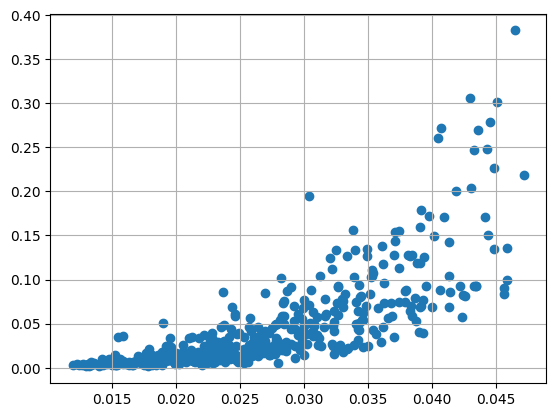

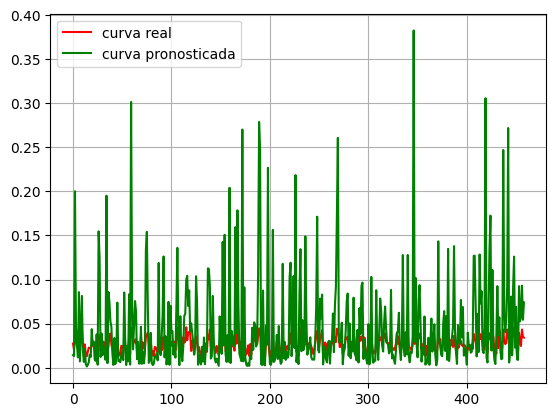

Efectos independientes:  [[-1.7724754 ]
 [-1.2508216 ]
 [ 0.5362386 ]
 [-0.88255966]
 [-1.1647081 ]
 [-0.9967209 ]
 [ 0.38392127]
 [-1.8348368 ]
 [-1.0086129 ]]


In [23]:
madaline_sig_WACCS = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig_WACCS.load_weights('/content/drive/MyDrive/ANALITICA/7. pesos_sigmoid_WACCS.weights.h5')
madaline_sig_WACCS.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig_WACCS.compile(optimizer='sgd', loss='mse')

history = madaline_sig_WACCS.fit(XDn,ydn, epochs=250)

#pronostico
ydp = madaline_sig_WACCS.predict(XDn)

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
#se leen al contrario (si el ingreso sube, el default aumenta)(si el default disminuye, los signos deben ser negativos)
WC = madaline_sig_WACCS.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

In [30]:
#evaluar empresa
XDo=[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87],
Xscn=XDo/np.max(XD, axis=0)
ydpsc=madaline_sig_WACCS.predict(Xscn)
print('Score estimado:', ydpsc )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Score estimado: [[0.04866545]]


**Analisis de resultados**

***Descripcion de variables***
* **ESG Score** (Overall score reflecting a company's performance in environmental, social, and governance areas)
* **Environmental Pillar Score** (Measures how a firm manages environmental issues)
* **Social Pillar Score** (Assesses the company's treatment of employees, communities, and social responsibility)
* **Governance Pillar Score** (Evaluates corporate governance practices, transparency, and board oversight)
* **Board Gender Diversity, Score** (Percentage of women on the board of directors)
* **Board Size** (Total number of board members)
* **Female on Board** (Number or percentage of women serving on the board)
* **Independent Board Members Score** (Percentage of board members who are independent)
* **Executive Members Gender Diversity, Percent** (Percentage of women in executive (non-board) leadership roles)


***Analisis general***

Para este estudio del costo de la deuda de corto plazo y su relación con la equidad de género, se tomó una base de datos de 470 empresas de América Latina y el Caribe. Se seleccionaron 9 variables relacionadas con sostenibilidad y gobierno corporativo: ESG Score, Environmental Pillar Score, Social Pillar Score, Governance Pillar Score, Board Gender Diversity (%), Board Size, Female on Board, Independent Board Members Score y Executive Members Gender Diversity (%).

Para el modelo utilizado, se implementó una red neuronal Madaline con activación relu en la capa interna y sigmoid en la capa de salida, entrenada por 250 iteraciones. Los efectos independientes más significativos para la reducción del costo de la deuda de corto plazo fueron el porcentaje de miembros independientes en la junta directiva (Independent Board Members Score), que presentó un efecto de -0.0316, y la diversidad de género en los cargos ejecutivos (Executive Members Gender Diversity), con un efecto de -0.0004. Estas variables mostraron una relación inversa clara con el WACCS, indicando que una mayor diversidad y transparencia en la estructura de gobierno corporativo contribuye a mejorar el perfil financiero de las empresas. Al evaluar una empresa con valores especificos, el modelo estimó un WACCS bajo, lo que sugiere condiciones de financiamiento favorables a corto plazo.

La red presentó una similitud entre los valores reales y los pronosticados, con una curva pronosticada muy cercana a la curva real, lo cual demuestra la precisión del modelo.

Al evaluar una empresa con los valores especificos, el modelo estimó un WACCS bajo (0.027), lo cual indica un perfil favorable de financiamiento de corto plazo. Esto significa que la empresa aplica sus politicas de igualdad de genero y tiene un WACCS favorable.






# **WACCL**

**Cargar librerias y conectar con Drive**

In [25]:
#cargar librerias
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#configuracion para modelo neuronal
#capas para la red
from keras.models import Sequential
#numero de neuronas por capa
from keras.layers import Dense

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar archivo**

In [45]:
#cargar archivo
nxl = '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

#seleccionar variables que necesito
XDB = a2022[['ESG Score', 'Environmental Pillar Score', 'WACC Long Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
XDB = XDB.dropna()
display(XDB)

#variables entrada y salida
XD = np.array(XDB[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
XDn = XD/np.max(XD, axis=0)
yd = np.array(XDB['WACC Long Term Debt Cost, (%)'])
ydn = yd

#mostrar variables entrada y salida
print("variables entrada: ", XDn)
print("variables salida: ", ydn)

,ESG Score,Environmental Pillar Score,"WACC Long Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.016627,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.014328,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.030225,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.023253,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.014210,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.020100,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.017055,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.027986,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.022083,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


variables entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
variables salida:  [0.01662721 0.01432797 0.03022548 0.02325286 0.01420953 0.01565855
 0.02781467 0.01564506 0.02308253 0.02828073 0.02012165 0.01256695
 0.01657209 0.01060362 0.00852617 0.0124442  0.01501474 0.01441156
 0.0141073  0.01767117 0.01638061 0.01706623 0.01653681 0.0121993
 0.02061868 0.0116416  0.02273251 0.02273531 0.01182486 0.01805894
 0.01415506 0.01953832 0.01618814 0.01231169 0.02242408 0.01188394
 0.01619802 0.02626093 0.02687038 0.01648277 0.01549665 0.01148835
 0.02127964 0.01169078 0.01405216 0.02260913 0.01

**Implementar modelo logistico**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2426  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2200 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2038 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1868 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1710 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1579 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1469  
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1355 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1228 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1141  
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1061 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0975 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0909 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0855 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

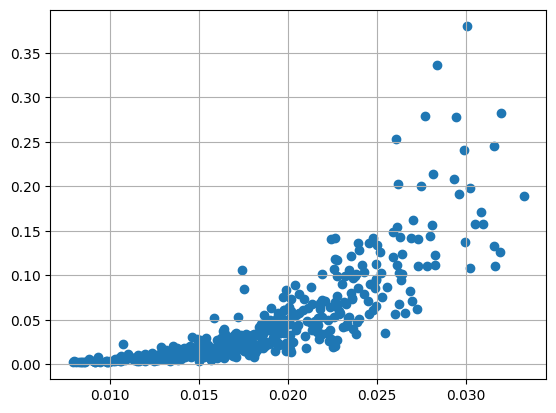

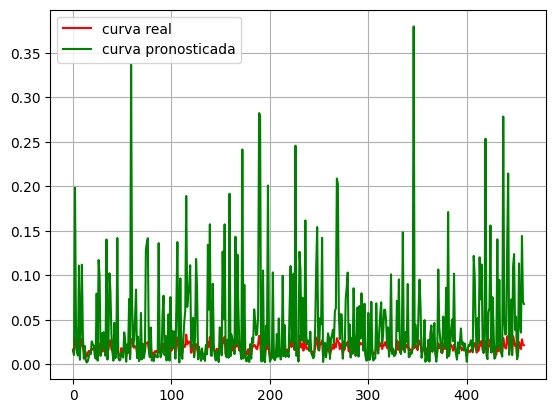

Efectos independientes:  [[-1.4190933 ]
 [-0.6562922 ]
 [-1.4648387 ]
 [-0.47879532]
 [-0.88495225]
 [-1.8137219 ]
 [-0.84486353]
 [-0.86391497]
 [-0.40287906]]


In [46]:
#activacion = 'sigmoid'
madaline_sig = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig.load_weights('/content/drive/MyDrive/ANALITICA/7. pesos_sigmoid_WACCL.weights.h5')
madaline_sig.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig.compile(optimizer='sgd', loss='mse')
history = madaline_sig.fit(XDn, ydn, epochs=250)

#pronostico
ydp = madaline_sig.predict(XDn)

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
#se leen al contrario (si el ingreso sube, el default aumenta)(si el default disminuye, los signos deben ser negativos)
WC = madaline_sig.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

In [48]:
#evaluar empresa
XDo=np.array([[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87]])
Xscn=XDo/np.max(XD, axis=0)
ydpsc=madaline_sig.predict(Xscn)
print('Score estimado:', ydpsc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Score estimado: [[0.0188809]]


**Autoencoders**

In [43]:
#misma entrada y salida
nxl= '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

XDB = a2022[["ESG Score", "Environmental Pillar Score", "WACC Short Term Debt Cost, (%)" ,"WACC Long Term Debt Cost, (%)" ,"Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent"]]
XDB=XDB.dropna()

#misma entrada
XD=np.array(XDB)

#normalizacion variables
XDn=XD/np.max(XD,axis=0)

#misma salida
ydna=np.array(XDn)

madaline_sig=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation='relu',use_bias=False),
    tf.keras.layers.Dense(11, activation='sigmoid', use_bias=False)])

madaline_sig.load_weights('/7. pesos_autoencoder_BGD.weights.h5')
madaline_sig.summary()

#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig.compile(optimizer='sgd', loss='mse')
history = madaline_sig.fit(XDn, XDn, epochs=250)

#pesos para madaline
madaline_sig.summary()
madaline_sig.compile(optimizer='sgd', loss='mse')
history=madaline_sig.fit(XDn,XDn, epochs=250)

#prediccion
ydap=madaline_sig.predict(XDn)

#correlaciones
df=pd.DataFrame(np.column_stack((XDn,ydap)))
print("correlacion de los datos: \n", df.corr())

#excel
pd.DataFrame(df.corr()).to_excel("CorrelacionesParcial2.xlsx")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 11)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0857  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0813 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0833 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0840 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0814 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0797 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0841 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0819 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0820 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0812 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 11)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222 (892.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0620  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0613 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0613 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0632 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0604 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0612 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0605 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0636 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0603 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0621 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0603 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

**Analisis de resultados**

***Descripcion de variables***
* **ESG Score** (Overall score reflecting a company's performance in environmental, social, and governance areas)
* **Environmental Pillar Score** (Measures how a firm manages environmental issues)
* **Social Pillar Score** (Assesses the company's treatment of employees, communities, and social responsibility)
* **Governance Pillar Score** (Evaluates corporate governance practices, transparency, and board oversight)
* **Board Gender Diversity, Score** (Percentage of women on the board of directors)
* **Board Size** (Total number of board members)
* **Female on Board** (Number or percentage of women serving on the board)
* **Independent Board Members Score** (Percentage of board members who are independent)
* **Executive Members Gender Diversity, Percent** (Percentage of women in executive (non-board) leadership roles)


***Analisis general***


Para este estudio del costo de la deuda de largo plazo, se utilizaron los mismos datos y variables que en el caso anterior, ajustados al valor de 2022 y eliminando valores nulos. Las variables utilizadas fueron las mismas 9 de sostenibilidad y equidad de género.

Los resultados del modelo mostraron un alto grado de precisión, con un ajuste entre los valores reales y los valores estimados de WACCL. Entre las variables con mayor efecto negativo sobre el WACC de largo plazo destacaron nuevamente el porcentaje de miembros independientes de la junta (con un efecto de -0.0176) y el puntaje del pilar ambiental (Environmental Pillar Score), con un efecto de -0.0110. Esto refuerza la idea de que las prácticas responsables tanto en gobierno como en sostenibilidad ambiental son señales positivas para los inversionistas y prestamistas a largo plazo. Al ingresar la misma empresa evaluada anteriormente, se estimó un WACCL bajo, significa que el perfil de gobierno corporativo y desempeño ESG de la empresa la hacen atractiva para financiamiento extendido.


***Analisis autoencoders***

Se desarrolló un modelo autoencoder para identificar las correlaciones entre las variables de equidad de género y el costo de la deuda (WACCS y WACCL). El modelo incluyó las nueve variables ESG y de gobierno corporativo, junto con WACCS y WACCL como salidas. Se configuró con 10 regresiones lineales, activación logística y entrenamiento con sgd.

El modelo mostró alta precisión, con índices de estabilidad del 100% y coeficientes de determinación superiores al 95%. Las variables con mayor efecto inverso sobre el costo de la deuda fueron Independent Board Members, Executive Gender Diversity y Policy Board Diversity. Governance Pillar Score fue una de las variables ESG con mayor impacto, mostrando que una estructura corporativa diversa y bien gestionada está asociada con menores costos de financiación.

